#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import os

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Bidirectional, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam


### Importing the Data

In [2]:
tweet = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv")
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Checking shape and length of dataframe

tweet.shape, len(tweet)

((7613, 5), 7613)

In [4]:
# Checking dataframe information
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Exploratory Data Analysis (EDA)

In [5]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 120

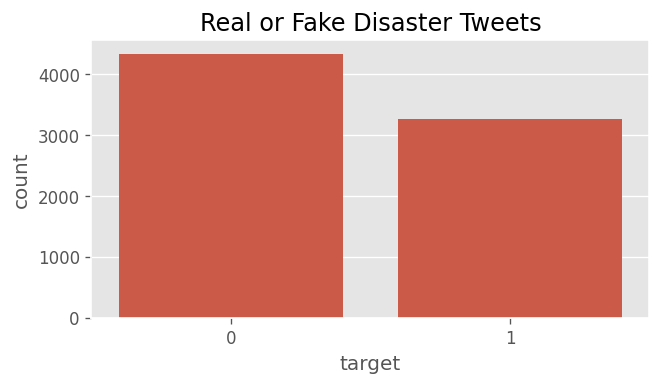

In [6]:
# Checking length of data which is 1 and length of data which is 0

sns.countplot(x='target', data=tweet)
plt.title('Real or Fake Disaster Tweets');

In [7]:
tweet['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

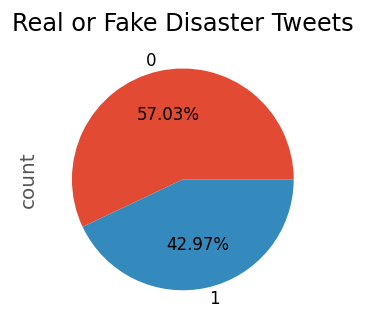

In [8]:
tweet['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Real or Fake Disaster Tweets');

#### Checking number of character in Tweets & its Distribution

In [9]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-5l1gmru2
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-5l1gmru2
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=0f9eb43a43977076a5beabf5b8735ff201a7f9b7f1d33920d384453adad4c70d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxex7yhb/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [10]:
import preprocess_kgptalkie as kgp

tweet = kgp.get_basic_features(tweet)
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


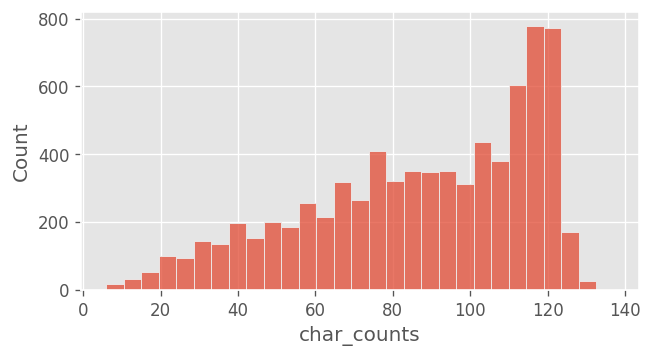

In [11]:
sns.histplot(tweet['char_counts']);

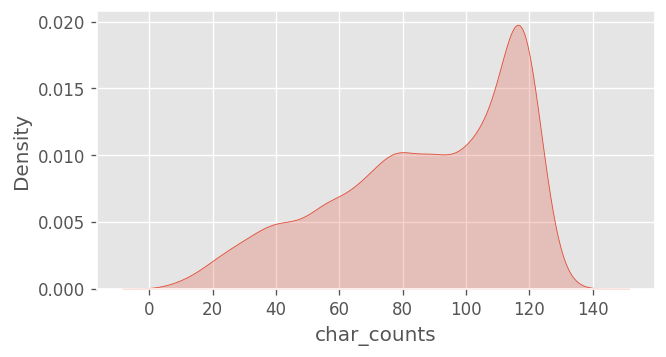

In [12]:
sns.kdeplot(tweet['char_counts'], fill=True);

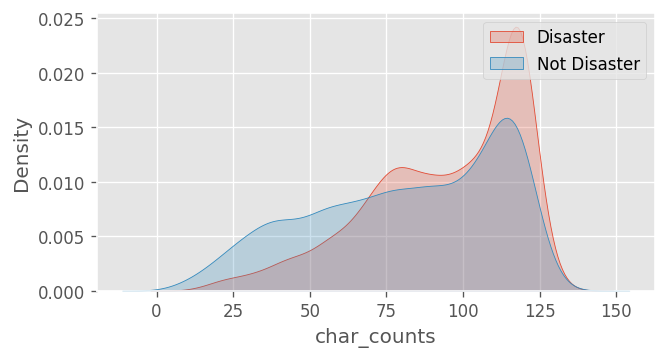

In [13]:
# Plotting not disaster and disaster

sns.kdeplot(tweet[tweet['target']==1]['char_counts'], fill=True);
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], fill=True);
plt.legend(['Disaster', 'Not Disaster']);

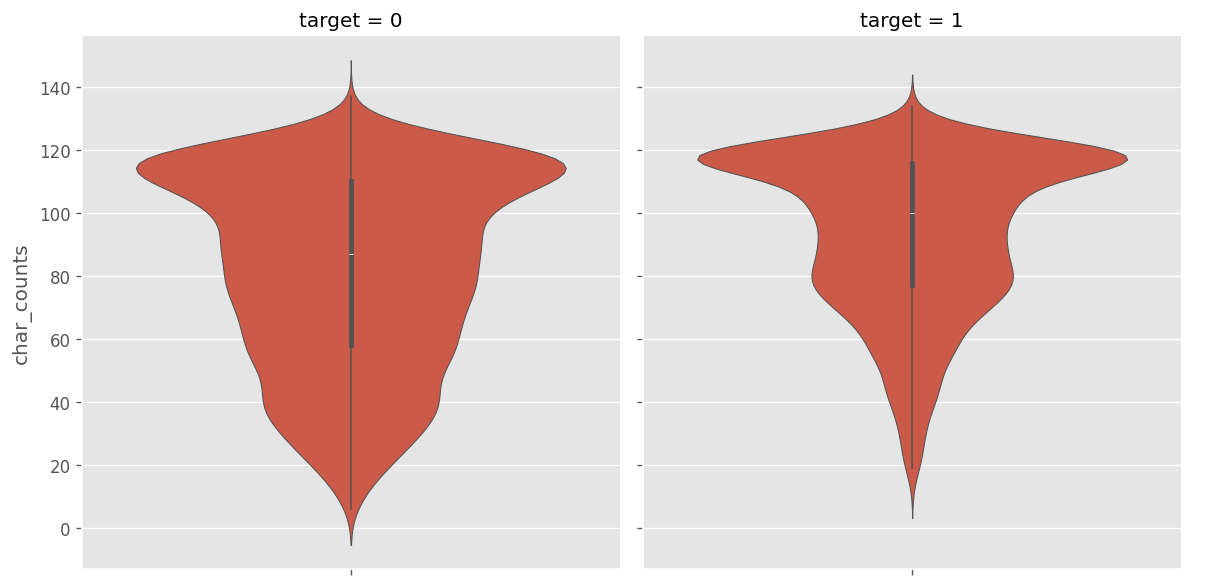

In [14]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='target');

#### Number of Words, Average Word Length, and Stop words Distribution in Tweets

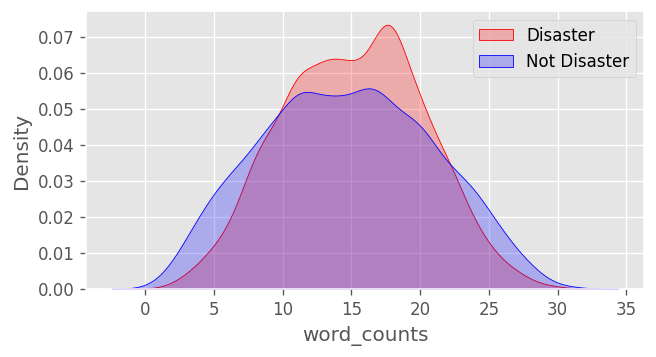

In [15]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], fill=True, color='red');
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], fill=True, color='blue');
plt.legend(['Disaster', 'Not Disaster']);

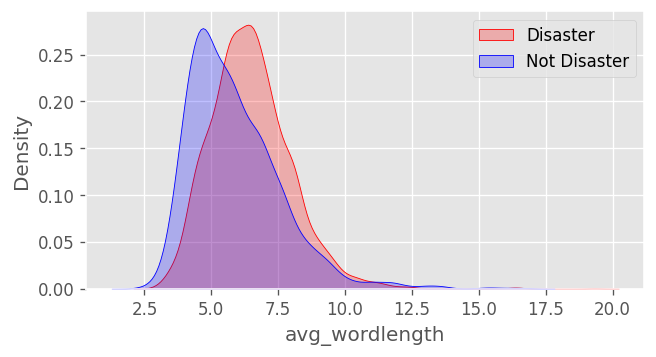

In [16]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], fill=True, color='red');
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], fill=True, color='blue');
plt.legend(['Disaster', 'Not Disaster']);

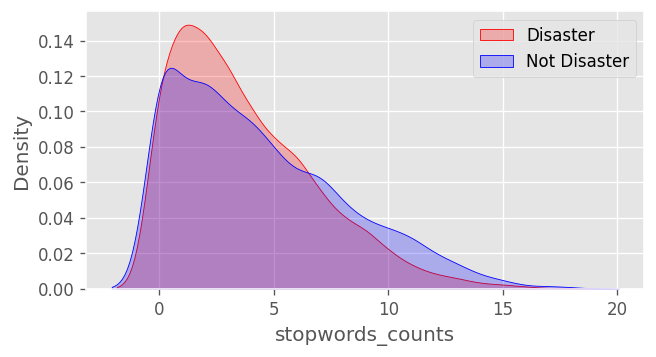

In [17]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], fill=True, color='red');
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], fill=True, color='blue');
plt.legend(['Disaster', 'Not Disaster']);

#### Distribution of most and least common words

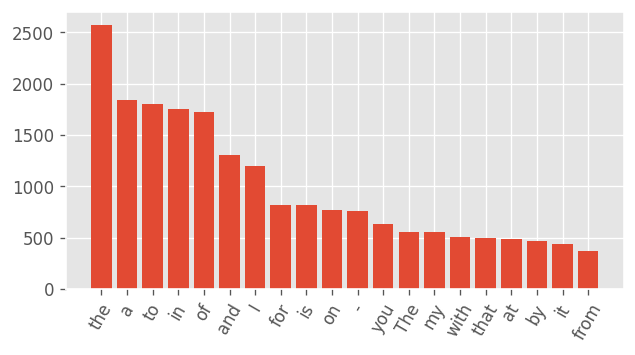

In [18]:
freqs = kgp.get_word_freqs(tweet, 'text')
top_20 = freqs[:20]
plt.bar(top_20.index, top_20.values);
plt.xticks(rotation=60);

In [19]:
# least 20 words
least_20 = freqs[-20:]
least_20

http://t.co/JD7rIK7fX0     1
ft.åÊM.O.P.                1
http://t.co/ZDTz3RbS6w     1
'Detonate.'                1
@ApolloBrown's             1
PLAY                       1
missed.                    1
detonate&amp;Shots         1
succeed                    1
marines                    1
@BBCTalkback               1
@rfcgeom66                 1
@tomfromireland            1
@SourMashNumber7           1
#FIYA!                     1
https://t.co/NlJVP3Vfyz    1
(Ft.                       1
Dix                        1
bandolier                  1
http://t.co/YmY4rSkQ3d     1
Name: count, dtype: int64

In [20]:
# Getting the Bigram
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)
bigram[:20]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

## Data Preprocessing

In [21]:
# One-Shot Data Cleaning
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    return x

In [22]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))
tweet.head()['text']

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

### Disaster Word Visualization with Word Cloud

In [23]:
# For real disaster
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire was are as have my news httpst over up more via an disaster were be people california suicide has no police who but when been killed like do will 2 hiroshima just than so out fires storm crash families we train about into now emergency s your buildings bomb all there mh370 what two they am nuclear attack wildfire video accident get one bombing minister burning northern new prime how legionnaires dead me bomber if some homes war car atomic still obama he fatal years off us forest collapse debris may watch city first malaysia japan man latest mass 1 or retweet near water severe today had earthquake those confirmed before would oil found 70 floods spill world army down home under warning 3 derailment wreckage outbreak weather injured evacuation 4 could being 40 saudi thunderstorm migrants old our can flooding during flood say missing investigators their time bridge back state death mosque her suspect kil

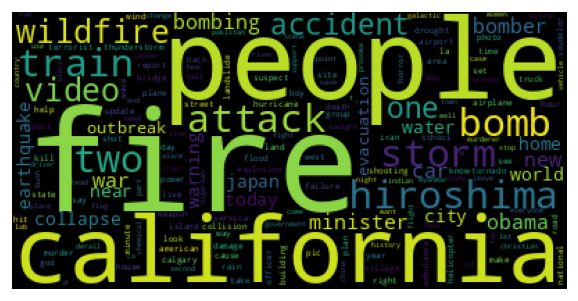

In [24]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show;

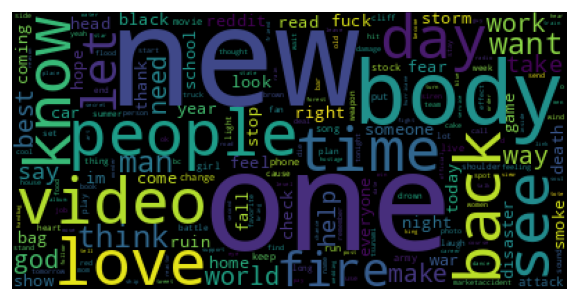

In [25]:
# For not-real disaster
nreal = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
nreal

word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show;

## Data Modelling

#### Classification with TFIDF and SVM

In [26]:
text = tweet['text']
y = tweet['target']

In [27]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text)

In [28]:
x.shape, y.shape

((7613, 22539), (7613,))

In [29]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

In [30]:
# Buiding a function for svm model
def run_svm(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [31]:
# import linear svc
from sklearn.svm import LinearSVC
clf = LinearSVC()

run_svm(clf, x_train, x_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       869
           1       0.81      0.72      0.76       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



### Classification with Word2Vec and SVM

In [32]:
# ! python -m spacy download en_core_web_lg

In [33]:
# import spacy
# import en_core_web_lg

In [34]:
# nlp = en_core_web_lg.load()

In [35]:
# def get_vec(x):
#   doc = nlp(x)
#   vec = doc.vector
#   return vec

In [36]:
# tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [37]:
# tweet.head()

In [38]:
# # Changing the vec column to numpy arrays
# x = tweet['vec'].to_numpy()
# x = x.reshape(-1, 1)
# x.shape

In [39]:
# x = np.concatenate(np.concatenate(x, axis=0),axis=0).reshape(-1, 300)
# x.shape

In [40]:
# y = tweet['target']

In [41]:
# x_train, x_test, y_train, y_test = train_test_split(x,
#                                                     y,
#                                                     test_size=0.2,
#                                                     random_state=42,
#                                                     stratify=y)

In [42]:
# %%time
# clf = LinearSVC()

# run_svm(clf, x_train, x_test, y_train, y_test)

### Preprocessing with Tokenization and Pad Sequences

In [43]:
token = Tokenizer()
token.fit_on_texts(text)

In [44]:
vocab_size = len(token.word_index)+1
vocab_size

22588

In [45]:
print(token.word_index)

{'httpt': 1, 'the': 2, 'a': 3, 'in': 4, 'to': 5, 'of': 6, 'i': 7, 'and': 8, 'is': 9, 'you': 10, 'for': 11, 'on': 12, 'it': 13, 'my': 14, 'not': 15, 'that': 16, 'with': 17, 'at': 18, 'by': 19, 'this': 20, 'have': 21, 'are': 22, 'from': 23, 'be': 24, 'was': 25, 'httpst': 26, 'do': 27, 'like': 28, 'as': 29, 'out': 30, 'am': 31, 'so': 32, 'your': 33, 'up': 34, 'me': 35, 'just': 36, 'but': 37, 'will': 38, 'after': 39, 'has': 40, 'all': 41, 'no': 42, 'fire': 43, 'an': 44, 'when': 45, 'if': 46, 'he': 47, 'new': 48, 'we': 49, 'get': 50, 'they': 51, 'now': 52, 'about': 53, 'via': 54, 'more': 55, 'people': 56, 'what': 57, 'or': 58, 'how': 59, 'one': 60, 'been': 61, 'there': 62, '2': 63, 'over': 64, 'news': 65, 'would': 66, 'who': 67, 'into': 68, 'were': 69, 'video': 70, 'can': 71, 'emergency': 72, 'disaster': 73, 'us': 74, 'police': 75, 'than': 76, 'off': 77, 'her': 78, 'some': 79, 'still': 80, 'his': 81, 'body': 82, 'back': 83, 'time': 84, 'burning': 85, 'california': 86, 'crash': 87, 'know': 8

In [46]:
# Getting Encoded Text
encoded_text = token.texts_to_sequences(text)
print(encoded_text)

[[109, 4494, 22, 2, 868, 6, 20, 246, 129, 1681, 4495, 74, 41], [186, 43, 223, 762, 6795, 6796, 1328], [41, 1682, 1435, 5, 2061, 4, 655, 22, 125, 6797, 19, 1683, 42, 437, 253, 58, 2061, 4, 655, 1329, 22, 1054], [2809, 56, 4496, 1330, 253, 1329, 4, 86], [36, 93, 1159, 20, 314, 23, 6798, 2062, 29, 261, 23, 1330, 6799, 68, 3, 189], [2810, 390, 86, 1553, 793, 829, 4, 637, 6800, 534, 5, 1106, 372, 43, 4497, 1330], [224, 73, 830, 282, 1160, 831, 247, 6, 1861, 4, 6801, 999, 2343, 1554], [7, 31, 12, 225, 6, 2, 1862, 8, 7, 71, 103, 3, 43, 4, 2, 4498], [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703], [7, 31, 2344, 16, 2, 489, 9, 240, 5, 109, 354], [586, 56, 611, 23, 2, 283, 467, 32, 612], [833, 613, 2811, 9, 217, 2812, 3468, 656, 3, 657, 7, 199, 4, 613, 2811, 57, 31, 7, 301, 27, 57, 31, 7, 301, 27, 6802, 247], [2813, 247, 2063, 6803, 2811, 1436, 58, 1863, 614, 7, 21, 735, 3469], [224, 4, 4499, 912, 49, 1684, 4499], [241, 5, 189, 391, 12, 2345, 4, 4500, 126, 87, 355], [638, 34, 96], [7, 110

In [47]:
max_len = 40
x = pad_sequences(encoded_text, maxlen=max_len, padding='post')

In [48]:
print(x), x.shape, y.shape

[[ 109 4494   22 ...    0    0    0]
 [ 186   43  223 ...    0    0    0]
 [  41 1682 1435 ...    0    0    0]
 ...
 [2709 2294 4486 ...    0    0    0]
 [  75 1092   39 ...    0    0    0]
 [   2  206   55 ...    0    0    0]]


(None, (7613, 40), (7613,))

### Building a CNN Model

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [50]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length= max_len))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 100)           2258800   
                                                                 
 conv1d (Conv1D)             (None, 39, 32)            6432      
                                                                 
 max_pooling1d (MaxPooling1  (None, 19, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 dense (Dense)               (None, 19, 32)            1056      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                        

In [52]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [53]:
# Fitting the model
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)



model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
191/191 [==============================] - 21s 75ms/step - loss: 0.6607 - accuracy: 0.5883 - val_loss: 0.6390 - val_accuracy: 0.6993
Epoch 2/5
191/191 [==============================] - 4s 20ms/step - loss: 0.5573 - accuracy: 0.7535 - val_loss: 0.5262 - val_accuracy: 0.7623
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.4004 - accuracy: 0.8340 - val_loss: 0.4949 - val_accuracy: 0.7623
Epoch 4/5
191/191 [==============================] - 2s 12ms/step - loss: 0.2731 - accuracy: 0.8985 - val_loss: 0.5171 - val_accuracy: 0.7347
Epoch 5/5
191/191 [==============================] - 3s 16ms/step - loss: 0.1808 - accuracy: 0.9360 - val_loss: 0.5309 - val_accuracy: 0.7328


In [54]:
# Getting model predictions
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x= pad_sequences(x, maxlen=max_len, padding='post')
  return x

In [55]:
x = 'Bomb blast is happening'
vec = get_encoded(x)

In [56]:
np.argmax(model.predict(vec), axis=-1)

1/1 [==============================] - 0s 236ms/step


array([0])

### BERT Model Building & Training

In [57]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 55.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316934 sha256=502a2673a4311cf92651787fe98478b0f879c7a73737ffb4b81ea230aab283b3
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=

In [58]:
import ktrain
from ktrain import text

In [59]:
(x_train, y_train), (x_test, y_test), prepoc = text.texts_from_df(train_df=tweet,
                                                                  text_column='text',
                                                                  label_columns='target',
                                                                  maxlen=max_len,
                                                                  preprocess_mode='bert')

['not_target', 'target']
      not_target  target
5865         1.0     0.0
3027         0.0     1.0
415          1.0     0.0
2452         0.0     1.0
3357         0.0     1.0
['not_target', 'target']
      not_target  target
5232         1.0     0.0
6207         1.0     0.0
4553         0.0     1.0
6253         0.0     1.0
2352         1.0     0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [60]:
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=prepoc)

Is Multi-Label? False
maxlen is 40


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [61]:
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=64)

In [62]:
learner.fit_onecycle(lr = 2e-5, epochs=1)



begin training using onecycle policy with max lr of 2e-05...
108/108 [==============================] - 84s 540ms/step - loss: 0.4962 - accuracy: 0.7651 - val_loss: 0.3787 - val_accuracy: 0.8386


In [63]:
# # To find the ideal learning rate
# learner.lr_find()
# learner.lr_plot()

### Model Evaluation

In [64]:
predictor = ktrain.get_predictor(learner.model, preproc=prepoc)

In [65]:
predictor.get_classes()

['not_target', 'target']

In [66]:
data = ["There is war happening in Ukraine, this means trouble for NATO",
        "KIng just got involved in a car accident",
        "I'm getting me a smoothie"]

In [67]:
predictor.predict(data)

['target', 'target', 'not_target']